# Final Project

Standard inputs

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
import math
for i in range(0,4):
    print (i)

0
1
2
3


Reading intput sample


In [10]:
FullData = []

with open('bank-additional-full.csv') as data_file:
    for line in data_file:
        FullData.append(line.strip().split(';'))

print(FullData[1]) # [i][j]

['56', '"housemaid"', '"married"', '"basic.4y"', '"no"', '"no"', '"no"', '"telephone"', '"may"', '"mon"', '261', '1', '999', '0', '"nonexistent"', '1.1', '93.994', '-36.4', '4.857', '5191', '"no"']


Removing the first line and call duration entry and converging into purelly numberic dataset: 
- features which are considered numeric are converted into numbers
- variables with only 2 possilbe outcome are converted to phone/cellular is converted to False/True
- variables with outcome yes, no, n/a are assinged yes=1, no=-1, n/a=0 so even if there is undesired averaging it will not generate bias because n/a can be considered as average between yes and no
- variables which are not considered as rank are sparced to avoid possible bias introduced by unjustified ordering 

In [11]:
def YesNoUnknown(field):
    if field == '"yes"'     or field == '"success"':
        return 1
    if field == '"no"'      or field =='"failure"':
        return -1
    if field == '"unknown"' or field =='"nonexistent"':
        return 0   
    
def YesNo(field):
    if field == '"yes"':
        return True
    if field == '"no"':
        return False


data = [[int(x[0]),
         1 if x[1] =='"admin."'              else 0,
         1 if x[1] =='"blue-collar"'         else 0,
         1 if x[1] =='"housemaid"'           else 0,
         1 if x[1] =='"entrepreneur"'        else 0,
         1 if x[1] =='"management"'          else 0,
         1 if x[1] =='"retired"'             else 0,
         1 if x[1] =='"self-employed"'       else 0,
         1 if x[1] =='"services"'            else 0,
         1 if x[1] =='"student"'             else 0,
         1 if x[1] =='"technician"'          else 0,
         1 if x[1] =='"unemployed"'          else 0,
         1 if x[1] =='"unknown"'             else 0,
         
         1 if x[2] =='"divorced"'            else 0,
         1 if x[2] =='"married"'             else 0,
         1 if x[2] =='"single"'              else 0,
         1 if x[2] =='"unknown"'             else 0,        
         
        
         1 if x[3] =='"basic.4y"'            else 0,
         1 if x[3] =='"basic.6y"'            else 0,
         1 if x[3] =='"basic.9y"'            else 0,
         1 if x[3] =='"high.school"'         else 0,
         1 if x[3] =='"illiterate"'          else 0,
         1 if x[3] =='"professional.course"' else 0,
         1 if x[3] =='"university.degree"'   else 0,
         1 if x[3] =='"unknown"'             else 0,
       
         YesNoUnknown(x[4]), 
         YesNoUnknown(x[5]),
         YesNoUnknown(x[6]),
         
         1 if x[7]=='"cellular"'         else 0,
         
         1 if x[8] =='"jan"'             else 0,
         1 if x[8] =='"fab"'             else 0,
         1 if x[8] =='"mar"'             else 0,
         1 if x[8] =='"apr"'             else 0,
         1 if x[8] =='"may"'             else 0,
         1 if x[8] =='"jun"'             else 0,
         1 if x[8] =='"jul"'             else 0,
         1 if x[8] =='"aug"'             else 0,
         1 if x[8] =='"sep"'             else 0,
         1 if x[8] =='"oct"'             else 0,
         1 if x[8] =='"nov"'             else 0,
         1 if x[8] =='"dec"'             else 0,
         
         1 if x[9] =='"mon"'             else 0,
         1 if x[9] =='"tue"'             else 0,
         1 if x[9] =='"wed"'             else 0,
         1 if x[9] =='"thu"'             else 0,
         1 if x[9] =='"fri"'             else 0,
         
         int(x[11]),
         int(x[12]),
         float(x[13]),
         YesNoUnknown(x[14]),
         float(x[15]),
         float(x[17]),
         float(x[18]),
         float(x[19])] for x in FullData[1:]]

y = [YesNo(x[20]) for x in FullData[1:]]

labels = FullData[0]

print(data[0])
print(data[1])
print(data[2])
print(len(data[1]))
print(labels)

[56, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 999, 0.0, 0, 1.1, -36.4, 4.857, 5191.0]
[57, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 999, 0.0, 0, 1.1, -36.4, 4.857, 5191.0]
[37, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 999, 0.0, 0, 1.1, -36.4, 4.857, 5191.0]
54
['"age"', '"job"', '"marital"', '"education"', '"default"', '"housing"', '"loan"', '"contact"', '"month"', '"day_of_week"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"emp.var.rate"', '"cons.price.idx"', '"cons.conf.idx"', '"euribor3m"', '"nr.employed"', '"y"']


As sparcing significantly increased the dimension of the problem it and many parameters are highly correlated, such as if call is done on Monday, it means all other days have zeros. Therefore, the PCA is performed to reduce the dimensionality of the problem and to visualize the data.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(len(data[0]))
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=54, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
Data_pca = pca.transform(data)

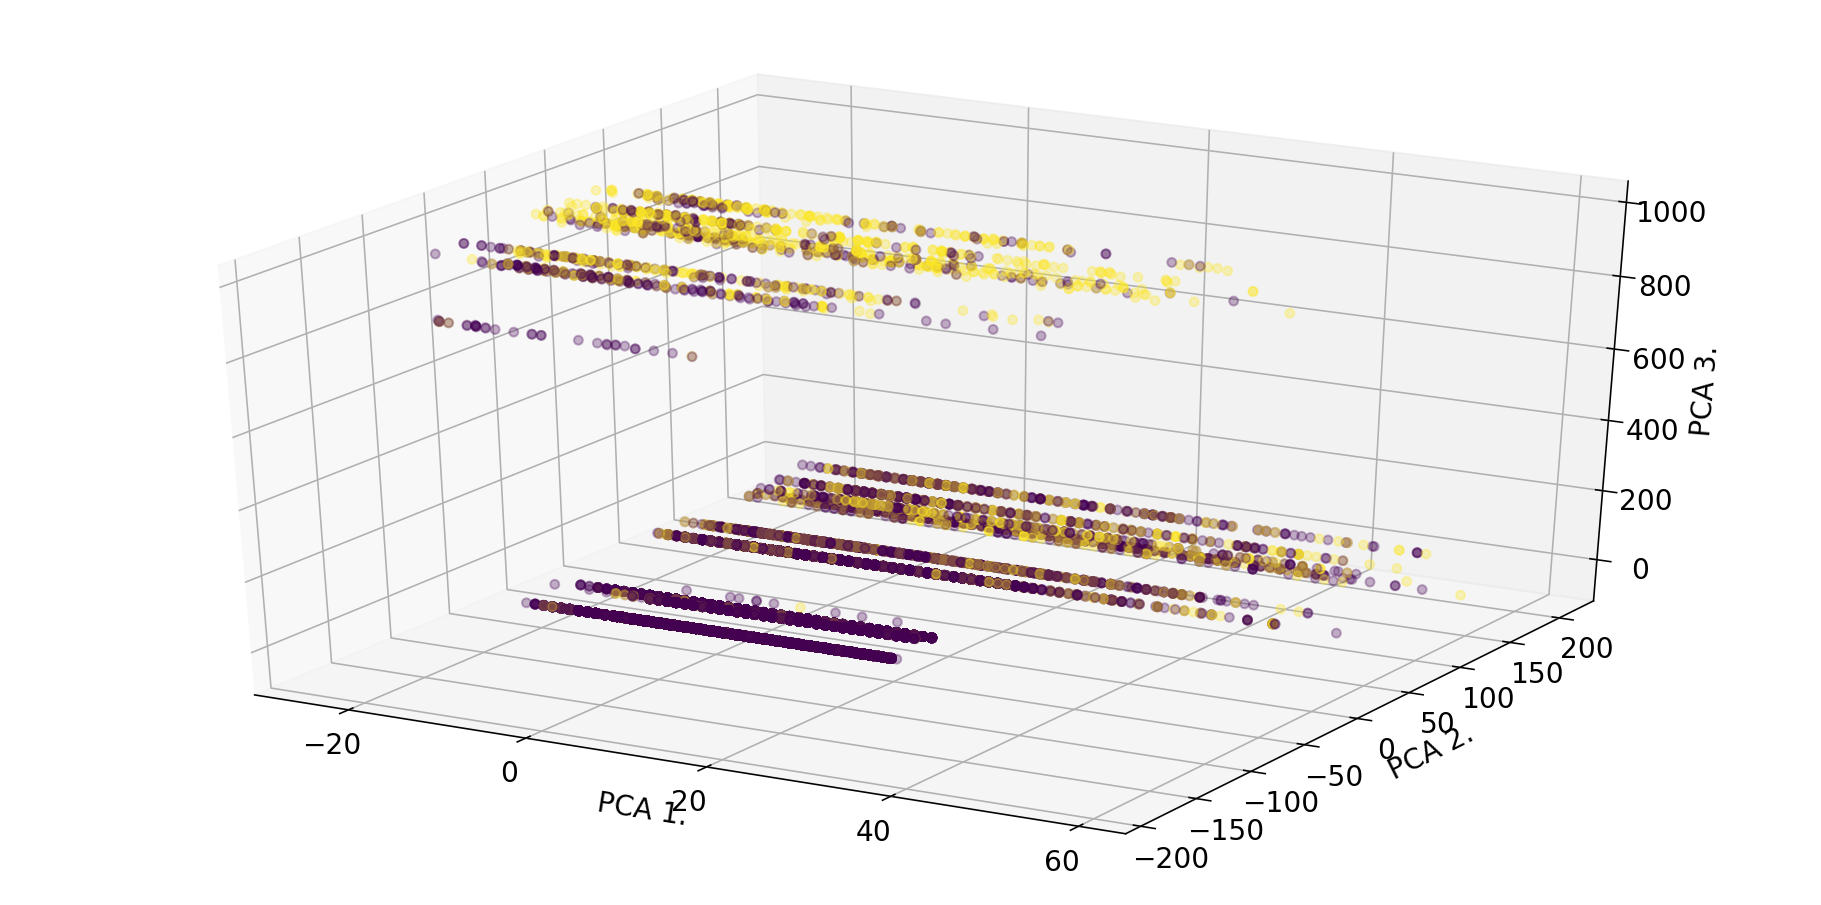

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PCA 1.')
ax.set_ylabel('PCA 2.')
ax.set_zlabel('PCA 3.')
ax.scatter(Data_pca[:, 2], Data_pca[:, 1],Data_pca[:, 0], alpha=0.3, c=y)

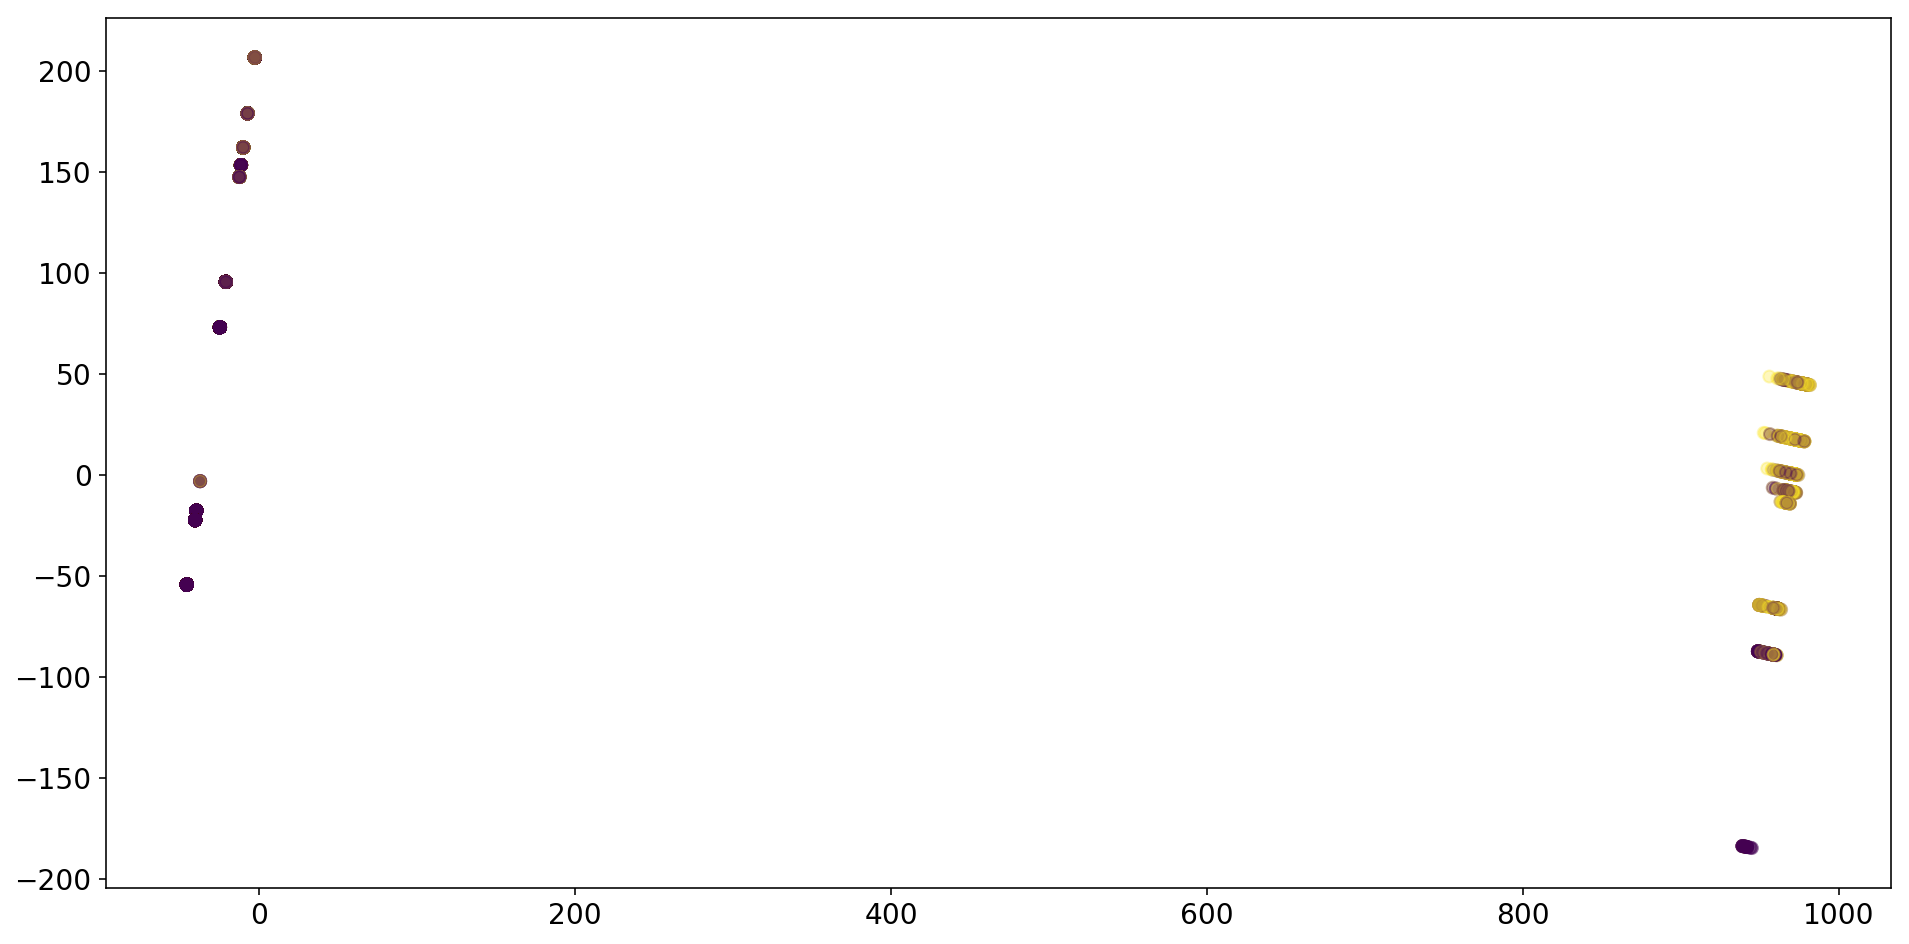

In [15]:
plt.scatter(Data_pca[:, 0], Data_pca[:, 1], alpha=0.3, c=y)

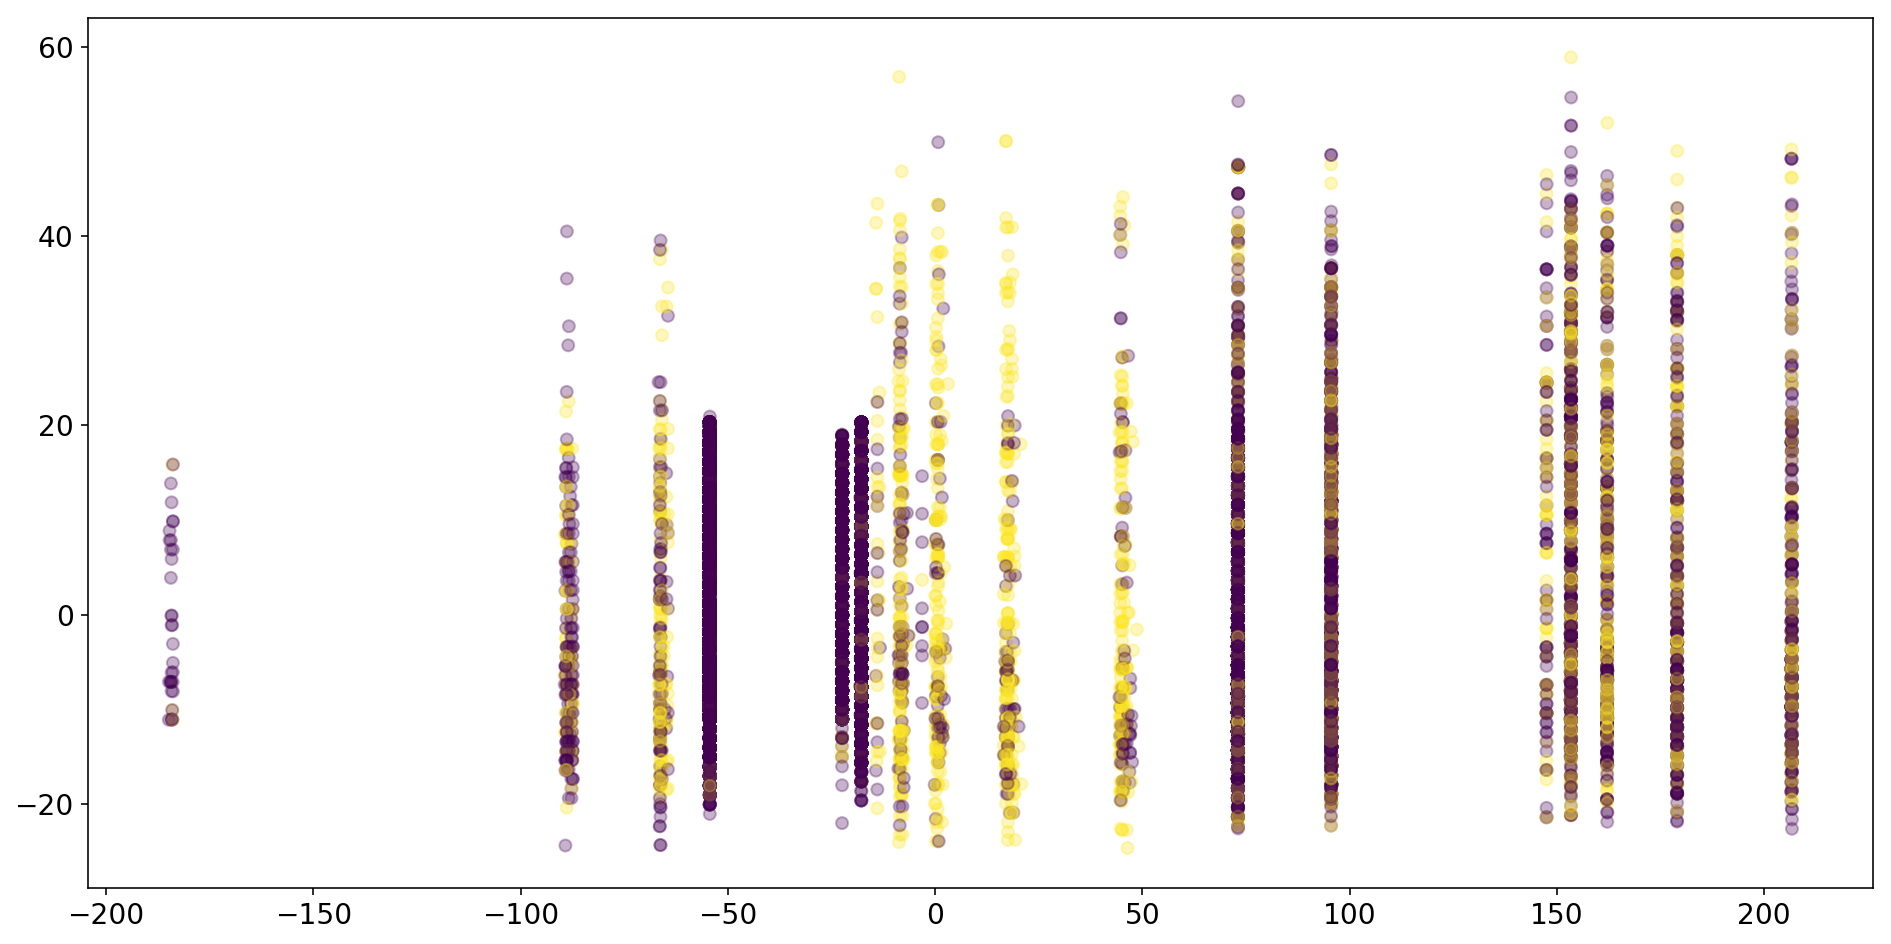

In [16]:
plt.scatter(Data_pca[:, 1], Data_pca[:, 2], alpha=0.3, c=y)

In [17]:
pca.explained_variance_

array([  3.57648221e+04,   4.39606353e+03,   1.08981339e+02,
         2.05483714e+01,   7.50621020e+00,   9.77788025e-01,
         6.57424994e-01,   5.21632194e-01,   4.18514425e-01,
         3.10544207e-01,   2.81437377e-01,   2.56562602e-01,
         2.30227868e-01,   2.09792036e-01,   2.07648308e-01,
         1.99243306e-01,   1.96611287e-01,   1.91741387e-01,
         1.82023796e-01,   1.52427465e-01,   1.43764279e-01,
         1.30936785e-01,   1.26289891e-01,   1.14970622e-01,
         1.06211534e-01,   8.14935371e-02,   7.38407648e-02,
         6.54726689e-02,   6.00222950e-02,   5.39637587e-02,
         4.69794798e-02,   4.43508937e-02,   3.49517788e-02,
         3.44227083e-02,   3.23813047e-02,   2.66131643e-02,
         2.41274811e-02,   1.96843843e-02,   1.86805607e-02,
         1.81079071e-02,   1.40885988e-02,   1.18226451e-02,
         8.84301802e-03,   8.25322419e-03,   4.64963381e-03,
         2.56739615e-03,   4.98390070e-04,   7.05336749e-27,
         3.52768541e-28,

Looking at the significance of PCA components an arbitrary cutoff on variance is selected to be after 8th component. It is in agreement with the previous expectation that there are many dimensions carry only very little information as they correspond to 'unknown' categories or to categories which are not so important for cusotomer preferences.

In [18]:
pcaRed = PCA(8)
pcaRed.fit(data)
X_pca = pcaRed.transform(data)

In [19]:
print(X_pca[0])

[-39.90080458 -17.76967991  16.31390112   2.98788072  -1.62912808
   1.18704785   0.76676443  -0.23939279]


The data is separated into training sample (60%) and validation sample (40%)

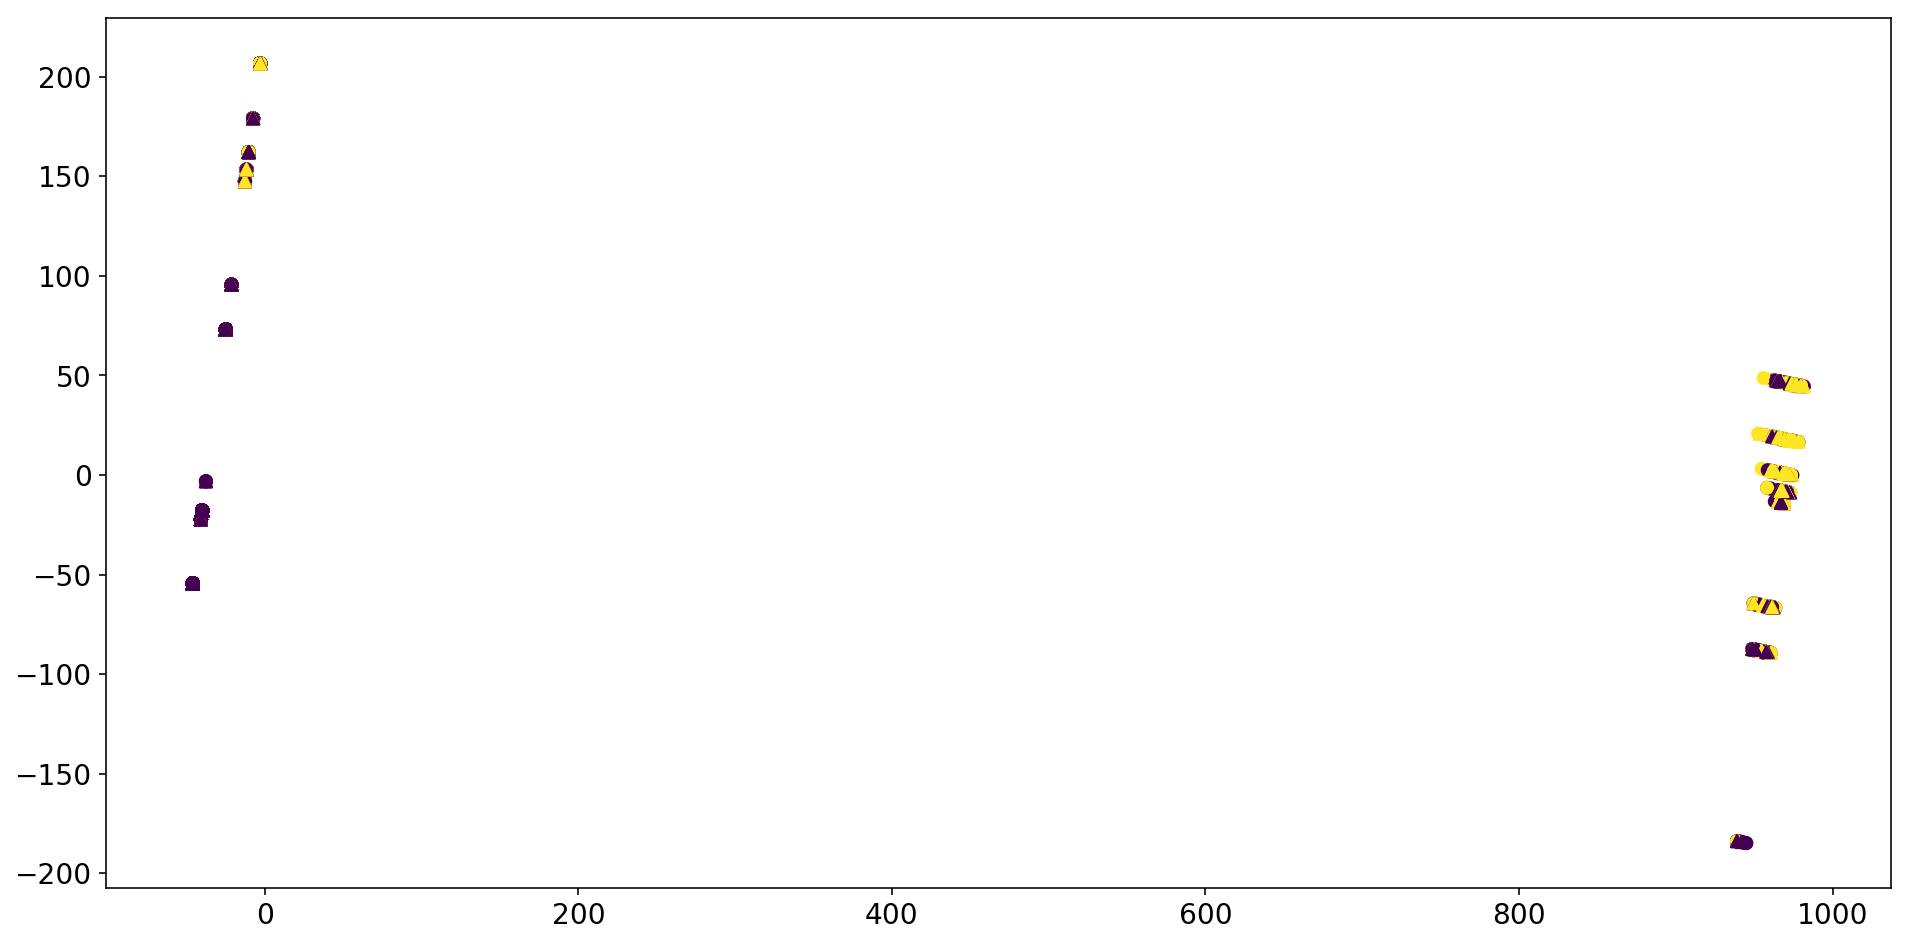

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^')

Function to calculate probabily of correct prediction form a classifier:

In [21]:
def GetProbabilities(clf, X_train, y_train, X_test, y_test):
    
    def GetProbs(X_m,y_m):
        Prediced_RFC_ = clf.predict(X_m)
        CorrectlyPredicted_RFC_ = [[Prediced_RFC_[i]==y_m[i]] for i in range(0,len(y_m)-1)]
        return np.sum(CorrectlyPredicted_RFC_)/len(X_m-1)

    return GetProbs(X_train,y_train),GetProbs(X_test, y_test)

Random Forests:

In [22]:
from sklearn.ensemble import RandomForestClassifier
clfRFC = RandomForestClassifier()
clfRFC.fit(X_train, y_train)
CPP_train, CPP = GetProbabilities(clfRFC,X_train, y_train, X_test,y_test) 
print ("Training:",CPP_train)
print ("Testing:",CPP)

Training: 0.982380077
Testing: 0.88508537671


Bagging classifier is examined:

In [23]:
from sklearn.ensemble import BaggingClassifier
clfBC = BaggingClassifier()
clfBC.fit(X_train, y_train)
CPP_train, CPP = GetProbabilities(clfBC,X_train, y_train, X_test,y_test) 
print ("Training:",CPP_train)
print ("Testing:",CPP)

Training: 0.982518816552
Testing: 0.883871489844


ExtraTreesClassifier is examined:

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
clfETC = ExtraTreesClassifier()
clfETC.fit(X_train, y_train)
CPP_train, CPP = GetProbabilities(clfETC,X_train, y_train, X_test,y_test) 
print ("Training:",CPP_train)
print ("Testing:",CPP)

Training: 0.995768443689
Testing: 0.878368536052


GradientBoostingClassifier is examined

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clfGBC = GradientBoostingClassifier()
clfGBC.fit(X_train, y_train)
CPP_train, CPP = GetProbabilities(clfGBC,X_train, y_train, X_test,y_test) 
print ("Training:",CPP_train)
print ("Testing:",CPP)

Training: 0.905899899414
Testing: 0.895362952173


Keras inputs, now the neural network will be examined

In [27]:
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.losses import sparse_categorical_crossentropy
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from keras import utils
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7)

In [29]:
X_train = np.array(X_train)
X_test  = np.array(X_test)


#X_train = X_train.reshape(len(X_train), 8,)
#X_test  = X_test.reshape(len(X_test), 8,)



X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

num_classes=2

#y_train = utils.to_categorical(y_train, num_classes)
#y_test  = utils.to_categorical(y_test, num_classes)

y_train = np.array(y_train)
y_test  = np.array(y_test)

y_train = y_train.reshape((-1, 1))
y_test  = y_test.reshape((-1, 1))
print(y_train[0])
print(y_train[1])
print(y_train.shape)

print(len(X_train), len(y_train))

[False]
[False]
(28831, 1)
28831 28831


In [30]:
model = Sequential()

model.add(Dense(200, activation='relu', input_shape=(X_train[1].shape)))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

In [31]:
model.compile(loss=sparse_categorical_crossentropy, optimizer=SGD(lr=0.001), metrics=['accuracy'])
#model.compile(loss=mean_squared_error, optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [73]:
history= model.fit(X_train,
                   y_train,
                   epochs=100,
                   batch_size=8, 
                   validation_split=0.2, 
                   verbose=True, validation_data=(X_test, y_test))


Train on 28831 samples, validate on 12357 samples
Epoch 1/100
28831/28831 [==============================] - 8s - loss: 0.4042 - acc: 0.8825 - val_loss: 0.2963 - val_acc: 0.9004

In [74]:
finalscore = model.evaluate(X_test, y_test, verbose=False)
print (finalscore)
print('Calculated test loss:', finalscore[0])
print('Calculated test accuracy:', finalscore[1])

[0.28191509012859733, 0.90038035121793314]
Calculated test loss: 0.281915090129
Calculated test accuracy: 0.900380351218


Full sample:
[1.80786642815319, 0.887836853605244]
Calculated test loss: 1.80786642815
Calculated test accuracy: 0.887836853605

PCA sample:
[0.20402410630014028, 0.90280812494942142]
Calculated test loss: 0.2040241063
Calculated test accuracy: 0.902808124949


In [32]:
datas = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(datas, y, train_size=0.7)

clfGBC = GradientBoostingClassifier()
clfGBC.fit(X_train, y_train)
CPP_train, CPP = GetProbabilities(clfGBC,X_train, y_train, X_test,y_test) 
print ("Training:",CPP_train)
print ("Testing:",CPP)

Training: 0.904789983004
Testing: 0.903050902323


In [33]:
Features = clfGBC.feature_importances_

In [34]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print( (Features*100))

#suma = sum(Features)
#print(suma)

[9.806 0.604 0.694 0.000 0.000 0.000 0.951 1.030 0.377 0.191 0.181 0.163
 1.493 0.529 0.071 0.239 0.000 0.392 0.175 0.000 0.688 0.000 0.869 0.312
 0.091 0.854 0.417 0.315 2.412 0.000 0.000 0.792 3.253 0.421 0.097 1.426
 0.105 0.000 1.511 0.000 0.783 1.507 0.706 0.414 0.820 3.579 4.306 9.119
 3.076 4.397 0.544 7.751 19.309 13.227]


In [35]:
FeaturesValues=np.zeros(20)

FeaturesValues[0]=Features[0]
for i in range(1,13):
    FeaturesValues[1]+=Features[i]
    
for i in range(13,17):
    FeaturesValues[2]+=Features[i]
    
for i in range(17,25):
    FeaturesValues[3]+=Features[i]    
    

FeaturesValues[4]=Features[25]
FeaturesValues[5]=Features[26]
FeaturesValues[6]=Features[27]
FeaturesValues[7]=Features[28]

for i in range(29,40):
    FeaturesValues[8]+=Features[i]    
    
    
for i in range(40,45):
    FeaturesValues[8]+=Features[i]    
    
    
FeaturesValues[11]=Features[45]

FeaturesValues[12]=Features[46]
FeaturesValues[13]=Features[47]
FeaturesValues[14]=Features[48]
FeaturesValues[15]=Features[49]
FeaturesValues[16]=Features[50]
FeaturesValues[17]=Features[51]
FeaturesValues[18]=Features[52]
FeaturesValues[19]=Features[53]

total = sum(FeaturesValues)

print(total)

1.0


In [38]:
for i in range (0, len(FeaturesValues)):
    print(labels[i],',', FeaturesValues[i]*100)

"age" , 9.8057349136
"job" , 5.68434662884
"marital" , 0.839464600728
"education" , 2.52786125115
"default" , 0.85416331994
"housing" , 0.416891164525
"loan" , 0.31546266208
"contact" , 2.41220560443
"month" , 11.8352904985
"day_of_week" , 0.0
"duration" , 0.0
"campaign" , 3.57898762792
"pdays" , 4.30600634458
"previous" , 9.11935997031
"poutcome" , 3.0759168685
"emp.var.rate" , 4.39672170395
"cons.price.idx" , 0.544371070085
"cons.conf.idx" , 7.75076872173
"euribor3m" , 19.3090357365
"nr.employed" , 13.2274113126
